#### Kiểm định ADF cho dữ liệu S&P500

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

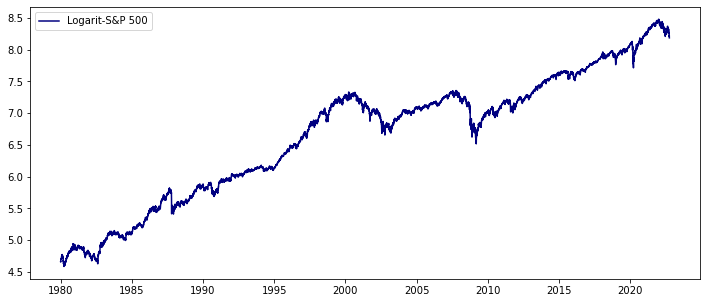

In [2]:
# Tải dữ liệu và biến đổi logarit
from scipy.stats import boxcox

sp500 = pd.read_csv('../Data/sp500.csv', parse_dates=['Date'])[['Date','Close']]
sp500['logarit'] = boxcox(sp500['Close'], lmbda = 0)

# Biểu đồ dữ liệu logarit-S&P 500
plt.subplots(figsize=(12,5))
plt.plot(sp500.Date, sp500.logarit, color="navy", label = "Logarit-S&P 500")
plt.legend()

In [3]:
# Kiểm định tính dừng xu thế
adf = adfuller(sp500.logarit, regression='ct', autolag='AIC')
print('test statistics:', adf[0])
print('p-value:', adf[1])
print('critical values:')
for key, value in adf[4].items():
    print('\t%s: %.3f' % (key, value))

test statistics: -2.00454785656727
p-value: 0.5989541498774158
critical values:
	1%: -3.960
	5%: -3.411
	10%: -3.127
